In [86]:
import math
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.io import imread, imsave
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# 1. Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. 
# Для этого можно воспользоваться функцией img_as_float из модуля skimage. 
# Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [4]:
image = img_as_float(imread('parrots.jpg'))
w, h, d = image.shape # 474 x 713 x 3, где 474х713 - размер изображения, а 3 соответствует формату представления RGB.

In [16]:
image[:3]

array([[[ 0.01568627,  0.49411765,  0.01960784],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21960784,  0.00784314],
        [ 0.        ,  0.20784314,  0.03137255],
        [ 0.00784314,  0.21568627,  0.04313725]],

       [[ 0.01568627,  0.49411765,  0.01960784],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.00392157],
        [ 0.        ,  0.20784314,  0.03137255],
        [ 0.        ,  0.20392157,  0.03137255]],

       [[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.00392157],
        [ 0.        ,  0.20392157,  0.03137255],
        [ 0.        ,  0.2       ,  0.03137255]]])

In [10]:
# 2.Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами-значениями интенсивности в пр-ве RGB.

In [13]:
pixels = pd.DataFrame(np.reshape(image, (w*h, d)), columns=['R', 'G', 'B'])

In [14]:
pixels[:10]

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765
5,0.011765,0.505882,0.011765
6,0.007843,0.513725,0.015686
7,0.003922,0.517647,0.007843
8,0.007843,0.521569,0.011765
9,0.000000,0.525490,0.003922


In [17]:
# 3. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. 
# После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: 
# медианным и средним цветом по кластеру.

In [87]:
def cluster(pixels, n_clusters):
    print ('Clustering: ' + str(n_clusters))

    pixels = pixels.copy()
    model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    pixels['cluster'] = model.fit_predict(pixels)

    # Заполнение изображения средним цветом по кластеру
    means = pixels.groupby('cluster').mean().values
    mean_pixels = [means[c] for c in pixels['cluster'].values]
    mean_image = np.reshape(mean_pixels, (w, h, d))
#     img_mean = plt.imshow(mean_image)
    imsave('parrots_mean_' + str(n_clusters) + '.jpg', mean_image)
   
    # Заполнение изображения медианным цветом по кластеру
    medians = pixels.groupby('cluster').median().values
    median_pixels = [medians[c] for c in pixels['cluster'].values]
    median_image = np.reshape(median_pixels, (w, h, d))
#     img_median = plt.imshow(median_image)
    imsave('parrots_median_' + str(n_clusters) + '.jpg', median_image)

    return mean_image,median_image

In [20]:
# 4. Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно.

In [21]:
def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10 * math.log10(float(1) / mse)

In [23]:
# 5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, 
# но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

Clustering: 1


C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: parrots_mean_1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: parrots_median_1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


9.818830935011212 9.427836929528231
Clustering: 2
12.08017003908078 11.65507251183346
Clustering: 3
13.15347666291897 12.774939847298594


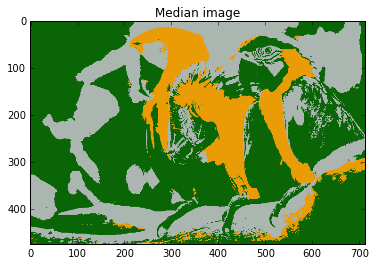

In [96]:
for n in range(1, 21):
    mean_image,median_image = cluster(pixels, n)
    img_mean = plt.imshow(mean_image)
    plt.title('Mean image')
    img_median = plt.imshow(median_image)
    plt.title('Median image')    
    psnr_mean, psnr_median = psnr(image, mean_image), psnr(image, median_image)
    print (psnr_mean, psnr_median)
      
    
    if psnr_mean > 13 or psnr_median > 13:
        break